### ARIMA (AutoRegressive Integrated Moving Average) 
is a class of statistical models used for time series forecasting. It combines three key components:

#### AutoRegressive (AR):
Uses the relationship between an observation and several lagged observations (previous time steps).

#### Integrated (I):
Involves differencing the data to make it stationary, which helps in removing trends.

#### Moving Average (MA):
Models the relationship between an observation and a residual error from a moving average model applied to lagged observations.

The ARIMA model is typically used for predicting future values in a time series when data shows a trend and some level of randomness (noise). It is a powerful tool for time series analysis because it doesn't require seasonal components like other models (e.g., SARIMA), but can still capture a variety of data patterns through the combination of AR, I, and MA terms.

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

In [14]:
#Sample data
data = {
    "Date": pd.date_range(start="2024-01-01", end="2024-01-20"),
    "Value": [100, 102, 101, 104, 107, 110, 115, 113, 117, 119, 
              118, 120, 125, 130, 128, 135, 137, 140, 138, 142]
}

print(data)

{'Date': DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20'],
              dtype='datetime64[ns]', freq='D'), 'Value': [100, 102, 101, 104, 107, 110, 115, 113, 117, 119, 118, 120, 125, 130, 128, 135, 137, 140, 138, 142]}


In [13]:
series = data['Value']
print(series)

[100, 102, 101, 104, 107, 110, 115, 113, 117, 119, 118, 120, 125, 130, 128, 135, 137, 140, 138, 142]


In [7]:
#Fit ARIMA
model = ARIMA (series, order = (2,1,2))
model_fit = model.fit()

#Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -44.720
Date:                Tue, 29 Apr 2025   AIC                             99.440
Time:                        20:40:04   BIC                            104.163
Sample:                             0   HQIC                           100.240
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3021      0.581      2.241      0.025       0.163       2.441
ar.L2         -0.3040      0.590     -0.515      0.607      -1.461       0.853
ma.L1         -1.9370     16.326     -0.119      0.9

C:\Users\Jarshana Shrestha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# Forecasting
forecast = model_fit.forecast(steps = 10)
print(forecast)

[144.73100099 147.3774068  149.99300651 152.59421093 155.18603655
 157.77002639 160.34666457 162.91611242 165.4784328  168.03365853]


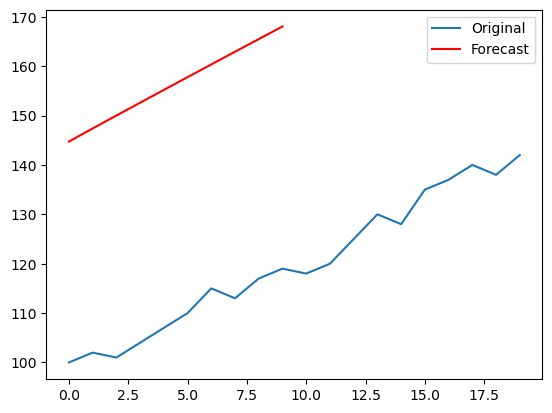

In [12]:
#Plot
plt.plot(series, label = 'Original')
plt.plot(forecast, label = 'Forecast', color= 'red')
plt.legend()
plt.show()